<a href="https://colab.research.google.com/github/pradeepelavarasan/Number-Recognition-MNIST/blob/master/Number_Recognition_EIP4A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D

from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


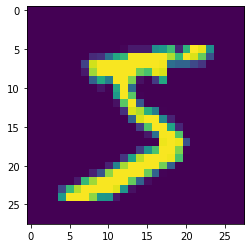

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# # basic code already existing
# # from keras.layers import Activation
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [0]:
# from keras.layers import Activation
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # output 26*26*32 ; Global RF 3*3
# model.add(Convolution2D(64, 3, activation='relu')) # output 24*24*64 ; Global RF 5*5
# model.add(Convolution2D(128, 3, activation='relu')) # output 22*22*128 ; Global RF 7*7
# model.add(Convolution2D(256, 3, activation='relu')) # output 20*20*256 ; Global RF 9*9
# model.add(Convolution2D(512, 3, activation='relu')) # output 18*18*256 ; Global RF 11*11
# model.add(Convolution2D(32, 1, activation='relu')) # output 18*18*32 ; Global RF 11*11
# model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) # output 9*9*32 ; Global RF 22*22
# model.add(Convolution2D(64, 3, activation='relu')) # output 7*7*64 ; Global RF 24*24
# model.add(Convolution2D(128, 3, activation='relu')) # output 5*5*128 ; Global RF 26*26
# model.add(Convolution2D(256, 3, activation='relu')) # output 3*3*256 ; Global RF 28*28
# model.add(Convolution2D(512, 3, activation='relu'))  # output 1*1*512 ; Global RF 30*30
# model.add(Convolution2D(10, 1, activation='relu')) # output 1*1*10
# model.add(Flatten())
# model.add(Activation('softmax'))

Exploring other options
Till 512 - 98.77
Till 1024 - 98.85
Double 512 and double 1024 - 98.76


In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # output 26*26*32 ; Global RF 3*3
model.add(Convolution2D(64, 3, activation='relu')) # output 24*24*64 ; Global RF 5*5
model.add(Convolution2D(128, 3, activation='relu')) # output 22*22*128 ; Global RF 7*7
model.add(Convolution2D(256, 3, activation='relu')) # output 20*20*256 ; Global RF 9*9
model.add(Convolution2D(512, 3, activation='relu')) # output 18*18*512 ; Global RF 11*11  --acc 98.77
model.add(Convolution2D(1024, 3, activation='relu')) # output 8*8*1024 ; Global RF 13*13  --acc 98.85
model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 16))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 512)       1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 1024)      4719616   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 10)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 90s 1ms/step - loss: 0.1607 - acc: 0.9527
Epoch 2/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0718 - acc: 0.9786
Epoch 3/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0538 - acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0462 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0374 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0329 - acc: 0.9898
Epoch 7/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0274 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0244 - acc: 0.9919
Epoch 9/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0225 - acc: 0.992

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.05078951814261163, 0.9865]


In [0]:
# y_pred = model.predict(X_test)

In [0]:
# print(y_pred[:9])
# print(y_test[:9])

In [0]:
# layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
# import numpy as np
# from matplotlib import pyplot as plt
# from keras import backend as K
# %matplotlib inline
# # util function to convert a tensor into a valid image
# def deprocess_image(x):
#     # normalize tensor: center on 0., ensure std is 0.1
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1

#     # clip to [0, 1]
#     x += 0.5
#     x = np.clip(x, 0, 1)

#     # convert to RGB array
#     x *= 255
#     #x = x.transpose((1, 2, 0))
#     x = np.clip(x, 0, 255).astype('uint8')
#     return x

# def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
#                       layer_name = 'conv2d_14'):
#     layer_output = layer_dict[layer_name].output
#     img_ascs = list()
#     for filter_index in range(layer_output.shape[3]):
#         # build a loss function that maximizes the activation
#         # of the nth filter of the layer considered
#         loss = K.mean(layer_output[:, :, :, filter_index])

#         # compute the gradient of the input picture wrt this loss
#         grads = K.gradients(loss, model.input)[0]

#         # normalization trick: we normalize the gradient
#         grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

#         # this function returns the loss and grads given the input picture
#         iterate = K.function([model.input], [loss, grads])

#         # step size for gradient ascent
#         step = 5.

#         img_asc = np.array(img)
#         # run gradient ascent for 20 steps
#         for i in range(20):
#             loss_value, grads_value = iterate([img_asc])
#             img_asc += grads_value * step

#         img_asc = img_asc[0]
#         img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
#     if layer_output.shape[3] >= 35:
#         plot_x, plot_y = 6, 6
#     elif layer_output.shape[3] >= 23:
#         plot_x, plot_y = 4, 6
#     elif layer_output.shape[3] >= 11:
#         plot_x, plot_y = 2, 6
#     else:
#         plot_x, plot_y = 1, 2
#     fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
#     ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
#     ax[0, 0].set_title('Input image')
#     fig.suptitle('Input image and %s filters' % (layer_name,))
#     fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
#     for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
#         if x == 0 and y == 0:
#             continue
#         ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
#         ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

# vis_img_in_filter()